## 1. 코랩 노트북 세팅

In [ ]:
# Mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Install the Kaggle library
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# 3. Copy the “kaggle.json” into this new directory
! cp '/content/drive/MyDrive/Colab Notebooks/book2/project/kaggle.json' ~/.kaggle/

In [ ]:
# 4. Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

# The colab notebook is now ready to download datasets from Kaggle.

## 2. Kaggle에서 데이터셋 다운로드

In [ ]:
# Downloading Datasets:
! kaggle datasets download stevezhenghp/airbnb-price-prediction

airbnb-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# 구글 드라이브에 다운받은 혹은 미리 올린 압축파일을 풀기 위해 라이브러리를 불러옵니다.
import zipfile

# 압축 파일(zip file)을 읽습니다.
zip_ref = zipfile.ZipFile('/content/airbnb-price-prediction.zip', 'r')

# 압축 파일을 풀어서 지정한 폴더(예: Data 폴더)에 저장합니다.
zip_ref.extractall('/content/drive/MyDrive/Data/')
zip_ref.close()

In [ ]:
# Bring the dataset on this kaggle notebook.
import pandas as pd
import numpy as np
# 모든 열을 출력하도록 설정
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
df.head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0


## 3. 데이터셋 살펴보기

In [ ]:
df.shape

(74111, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

## 4. ID 변수 확인

In [ ]:
# 'id' 컬럼의 데이터 타입 확인
df['id'].dtype

dtype('int64')

In [ ]:
# 'id' 컬럼의 결측치 개수를 계산
df['id'].isnull().sum()

0

In [ ]:
# 'id' 컬럼의 고유값의 개수를 계산
n = len(pd.unique(df['id']))
print(n)

74111


## 5. 타겟변수 생성 및 비율 점검

In [ ]:
# 'log_price' 컬럼의 데이터 타입 확인
df['log_price'].dtype

dtype('float64')

In [ ]:
# 'log_price' 컬럼의 결측치 개수를 계산
df['log_price'].isnull().sum()

0

In [ ]:
# 'log_price' 컬럼의 값들의 개수를 계산하고, 결측값을 포함하여 출력
df["log_price"].value_counts(dropna=False)

5.01    2729
4.61    2707
4.32    2049
5.30    1923
3.91    1920
        ... 
7.00       1
6.73       1
7.07       1
6.16       1
6.36       1
Name: log_price, Length: 767, dtype: int64

In [ ]:
# 'log_price' 컬럼의 값들의 개수를 계산하고, 결측값을 포함하여 각 값의 비율을 출력
df['log_price'].value_counts(dropna=False, normalize=True)

5.01   0.04
4.61   0.04
4.32   0.03
5.30   0.03
3.91   0.03
       ... 
7.00   0.00
6.73   0.00
7.07   0.00
6.16   0.00
6.36   0.00
Name: log_price, Length: 767, dtype: float64

In [ ]:
df['log_price'].describe()

count   74111.00
mean        4.78
std         0.72
min         0.00
25%         4.32
50%         4.71
75%         5.22
max         7.60
Name: log_price, dtype: float64

## 6. 기타 변수 데이터 처리

In [ ]:
# 데이터셋의 열 정보 확인
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
# 구간 변수를 cols에 저장
col = ['accommodates', 'bathrooms', 'first_review',
       'host_since', 'last_review', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds']
df[col].dtypes

accommodates              int64
bathrooms               float64
first_review             object
host_since               object
last_review              object
number_of_reviews         int64
review_scores_rating    float64
bedrooms                float64
beds                    float64
dtype: object

In [ ]:
# 소수점 이하 두 자리까지 표시하도록 설정
pd.options.display.float_format = '{:.2f}'.format
df[col].describe()

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.00,73911.00,74111.00,57389.00,74020.00,73980.00
mean,3.16,1.24,20.90,94.07,1.27,1.71
std,2.15,0.58,37.83,7.84,0.85,1.25
min,1.00,0.00,0.00,20.00,0.00,0.00
25%,2.00,1.00,1.00,92.00,1.00,1.00
50%,2.00,1.00,6.00,96.00,1.00,1.00
75%,4.00,1.00,23.00,100.00,1.00,2.00
max,16.00,8.00,605.00,100.00,10.00,18.00


In [ ]:
n = len(pd.unique(df['number_of_reviews']))
print(n)

371


In [ ]:
# 기준(criterion) 생성
c = df['number_of_reviews'] >= 20
df[c].head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
8,180792,4.79,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.00,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,2016-02-13,t,f,100%,2015-06-04,f,2017-09-24,37.78,-122.50,Cozy Garden Studio - Private Entry,Richmond District,159,99.00,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.00,1.00
10,5578513,4.61,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,t,t,100%,2013-03-27,f,2016-11-15,40.72,-73.98,Large East Village Bedroom To Let!,Alphabet City,82,93.00,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.00,1.00
11,17423675,5.01,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.50,Real Bed,strict,True,LA,"A 1044 sq. ft., 1950's beach house. 3 Blocks f...",2015-07-02,t,t,100%,2015-06-11,f,2016-11-18,33.88,-118.40,Sand Section Beach Bungalow,Hermosa Beach,29,97.00,NaN,90254,2.00,2.00


에어 비앤비 플랫폼 특성 상 대부분의 사용자들이 리뷰 개수를 우선적으로 체크하는 등 리뷰에 대한 의존도가 높습니다. 그에 따라 저희는 보다 의미 있는 숙소 숙박 가격 분석을 위해서 리뷰의 개수가 20개 이상인 데이터만 다루도록 설정하였습니다.

In [ ]:
# 리뷰 개수가 20개 이상인 데이터의 개수를 계산
len(df[c])

20820

In [ ]:
# 리뷰 개수가 6개 이상인 데이터의 비율을 계산
len(df[c]) / len(df)

0.28092995641672625

In [ ]:
df = df[c]
df.shape

(20820, 29)

In [ ]:
# 범주형 변수를 col에 저장
col = ['property_type', 'room_type', 'bed_type',
    'cancellation_policy','cleaning_fee', 'city',
    'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df[col].isnull().sum()

property_type              0
room_type                  0
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_has_profile_pic      46
host_identity_verified    46
instant_bookable           0
dtype: int64

In [ ]:
df[col].dtypes
# 범주형 변수 중 모든 변수들이 명목형 변수이다.

property_type             object
room_type                 object
bed_type                  object
cancellation_policy       object
cleaning_fee                bool
city                      object
host_has_profile_pic      object
host_identity_verified    object
instant_bookable          object
dtype: object

## 7. 결측값 50% 초과 변수 제거

In [ ]:
# df에서 결측값이 있는 변수명 확인
df.isna().any()[lambda x: x]

bathrooms                 True
first_review              True
host_has_profile_pic      True
host_identity_verified    True
host_response_rate        True
host_since                True
neighbourhood             True
review_scores_rating      True
thumbnail_url             True
zipcode                   True
bedrooms                  True
beds                      True
dtype: bool

In [ ]:
missing_ratio = df[['bathrooms', 'first_review', 'host_has_profile_pic', 'host_identity_verified',
                    'host_response_rate', 'host_since', 'neighbourhood', 'review_scores_rating',
                    'thumbnail_url', 'zipcode', 'bedrooms', 'beds']].isnull().mean()

print(missing_ratio)

bathrooms                0.00
first_review             0.00
host_has_profile_pic     0.00
host_identity_verified   0.00
host_response_rate       0.04
host_since               0.00
neighbourhood            0.07
review_scores_rating     0.00
thumbnail_url            0.07
zipcode                  0.01
bedrooms                 0.00
beds                     0.00
dtype: float64


결측값이 50% 초과하는 변수가 존재하지 않음을 확인할 수 있었습니다.

## 8-1. 구간 변수 - 요약통계 검토

In [ ]:
# 날짜 관련 변수를 제외한 구간 변수를 col에 저장
col = ['accommodates', 'bathrooms', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds']
df[col].describe()

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
count,20820.00,20744.00,20820.00,20805.00,20787.00,20812.00
mean,3.41,1.20,63.06,94.19,1.25,1.83
std,2.20,0.52,50.53,4.44,0.82,1.34
min,1.00,0.00,20.00,63.00,0.00,0.00
25%,2.00,1.00,29.00,92.00,1.00,1.00
50%,2.00,1.00,46.00,95.00,1.00,1.00
75%,4.00,1.00,78.00,97.00,1.00,2.00
max,16.00,8.00,605.00,100.00,9.00,18.00


In [ ]:
# +- 3 이하면 OK
# skew()의 결과값 즉, 왜도가 1에 가까우면 오른쪽으로 꼬리가 길고, -1에 가까우면 왼쪽으로 꼬리가 긴 그래프임을 의미한다.
df[col].skew()

accommodates            2.05
bathrooms               3.61
number_of_reviews       2.56
review_scores_rating   -1.36
bedrooms                1.71
beds                    3.00
dtype: float64

In [ ]:
# +- 10 이하면 OK
# kurtosis()의 결과값 즉, 첨도가 높으면 뾰족한 그래프임을 의미한다.
df[col].kurtosis()

accommodates            6.11
bathrooms              22.56
number_of_reviews      10.21
review_scores_rating    2.44
bedrooms                5.53
beds                   15.67
dtype: float64

In [ ]:
# 정상 범위를 벗어나는 변수들에 대하여 로그 변환 수행
col_log = df[['bathrooms', 'number_of_reviews', 'beds']].transform((lambda x: np.log(x+1)))

In [ ]:
df[col_log.columns] = col_log

In [ ]:
df[col].skew()

accommodates            2.05
bathrooms               2.07
number_of_reviews       0.60
review_scores_rating   -1.36
bedrooms                1.71
beds                    1.28
dtype: float64

In [ ]:
df[col].kurtosis()

accommodates            6.11
bathrooms               6.57
number_of_reviews      -0.31
review_scores_rating    2.44
bedrooms                5.53
beds                    1.34
dtype: float64

## 8-2. 구간 변수 - 이상값 제거

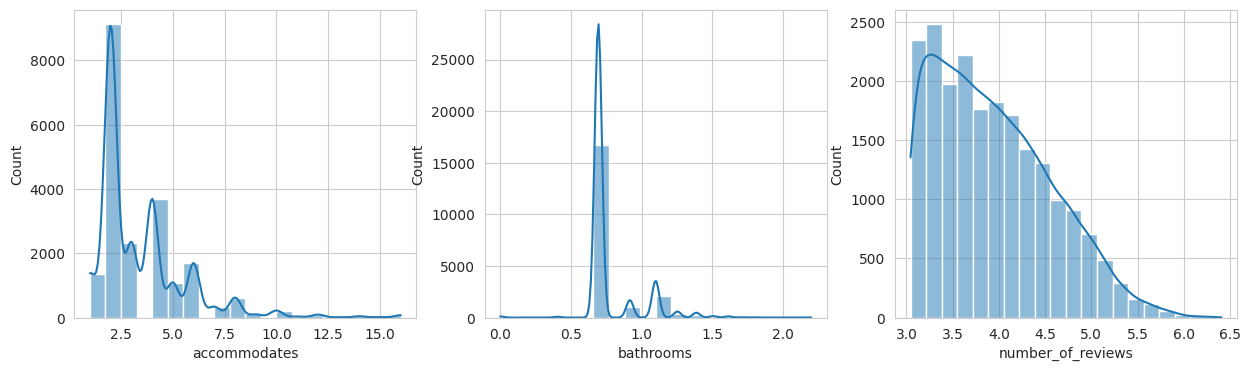

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="accommodates", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="bathrooms", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="number_of_reviews", kde=True, bins=20);
plt.show()

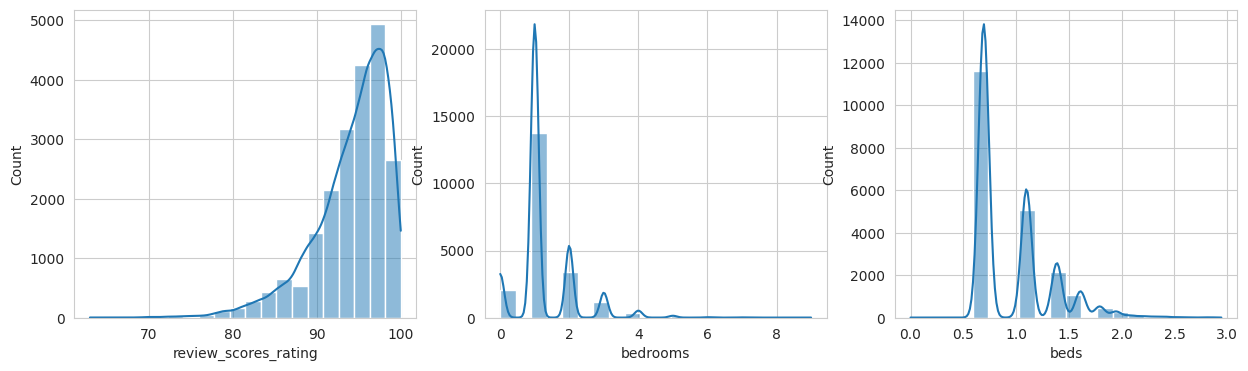

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="review_scores_rating", kde=True, bins=20)
sns.histplot(ax=axes[1], data=df, x="bedrooms", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="beds", kde=True, bins=20);
plt.show()

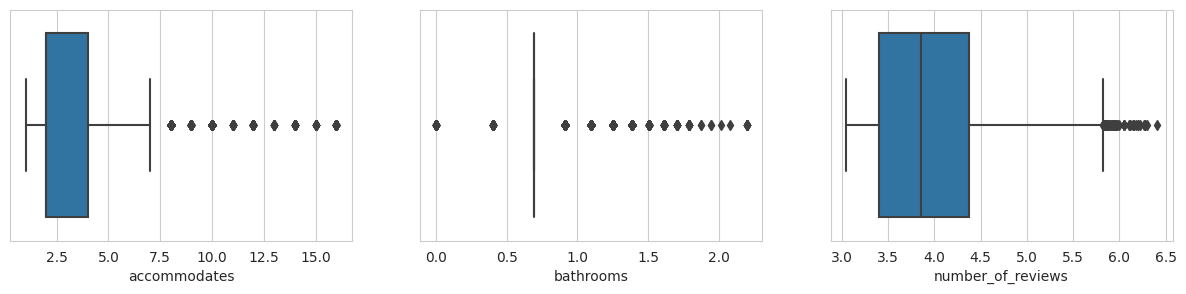

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# boxplot() 함수로 그린 박스플롯 그래프의 디폴트는 1.5 * IQR Rule이 적용되어 있다.
sns.boxplot(ax=axes[0], x = 'accommodates', data = df)
sns.boxplot(ax=axes[1], x = 'bathrooms', data = df)
sns.boxplot(ax=axes[2], x = 'number_of_reviews', data = df);

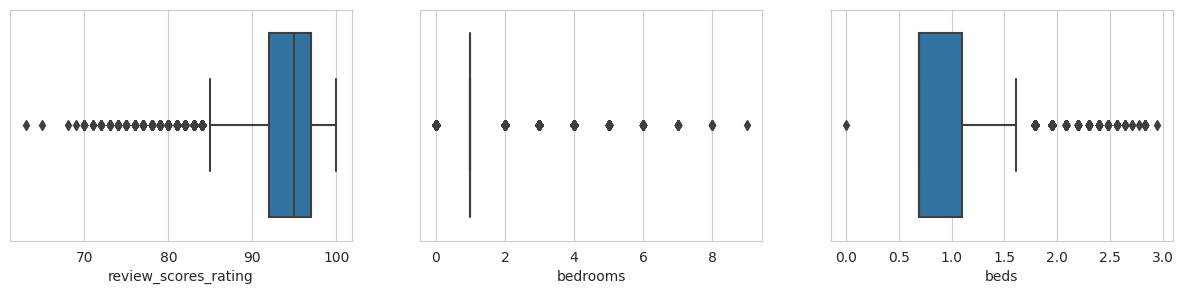

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.boxplot(ax=axes[0], x = 'review_scores_rating', data = df);
sns.boxplot(ax=axes[1], x = 'bedrooms', data = df);
sns.boxplot(ax=axes[2], x = 'beds', data = df);

In [ ]:
# 1사분위수
Q1 = df[col].quantile(0.25)
# 3사분위수
Q3 = df[col].quantile(0.75)
# IQR(데이터의 중간 50% 범위를 나타내는 통계적 지표)
IQR = Q3 - Q1
print(IQR)

accommodates           2.00
bathrooms              0.00
number_of_reviews      0.97
review_scores_rating   5.00
bedrooms               0.00
beds                   0.41
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR  # 하한
Upper = Q3+3.0*IQR  # 상한

In [ ]:
print(Lower)

accommodates           -4.00
bathrooms               0.69
number_of_reviews       0.50
review_scores_rating   77.00
bedrooms                1.00
beds                   -0.52
dtype: float64


In [ ]:
print(Upper)

accommodates            10.00
bathrooms                0.69
number_of_reviews        7.27
review_scores_rating   112.00
bedrooms                 1.00
beds                     2.32
dtype: float64


'bathrooms' 변수와 'bedrooms' 변수 각각의 상한과 하한이 모두 같습니다.

이는 IQR(Interquartile Range, 사분 범위) 값이 0이라는 의미입니다.

IQR 값이 0이라는 것은 해당 변수의 값들이 모두 같다는 것을 의미합니다.

즉, 해당 변수들은 데이터에 대한 정보를 제공하지 않는 것으로 간주할 수 있습니다.

따라서 해당 변수들은 분석에서 제외되는 것이 맞기 때문에 데이터셋에서 제거하겠습니다.

In [ ]:
# 'bathrooms' 변수와 'bedrooms' 변수를 데이터셋에서 제거
df = df.drop(['bathrooms', 'bedrooms'], axis = 1)

In [ ]:
c1 = df['accommodates'] <= 10
c2 = (df['number_of_reviews'] >= 0.5) & (df['number_of_reviews'] <= 7.27)
c3 = (df['review_scores_rating'] >= 77) & (df['review_scores_rating'] <= 112)
c4 = df['beds'] <= 2.32

df = df[c1 & c2 & c3 & c4]
df.shape

(20435, 27)

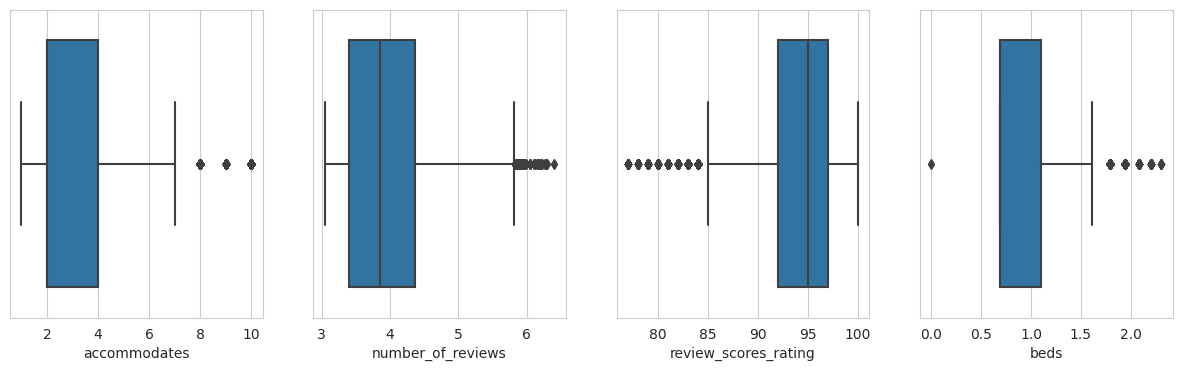

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# boxplot() 함수로 그린 박스플롯 그래프의 디폴트는 1.5 * IQR Rule이 적용되어 있다.
sns.boxplot(ax=axes[0], x = 'accommodates', data = df)
sns.boxplot(ax=axes[1], x = 'number_of_reviews', data = df);
sns.boxplot(ax=axes[2], x = 'review_scores_rating', data = df);
sns.boxplot(ax=axes[3], x = 'beds', data = df);

## 8-3. 구간 변수 - 상관관계 검토

In [ ]:
# 구간 변수를 col에 저장
col = ['accommodates', 'number_of_reviews', 'review_scores_rating', 'beds']

# 구간 변수간 상관계수를 소수점 둘째자리까지 반올림하여 출력
round(df[col].corr(), 2)

,accommodates,number_of_reviews,review_scores_rating,beds
accommodates,1.00,-0.02,-0.10,0.85
number_of_reviews,-0.02,1.00,-0.02,-0.02
review_scores_rating,-0.10,-0.02,1.00,-0.09
beds,0.85,-0.02,-0.09,1.00


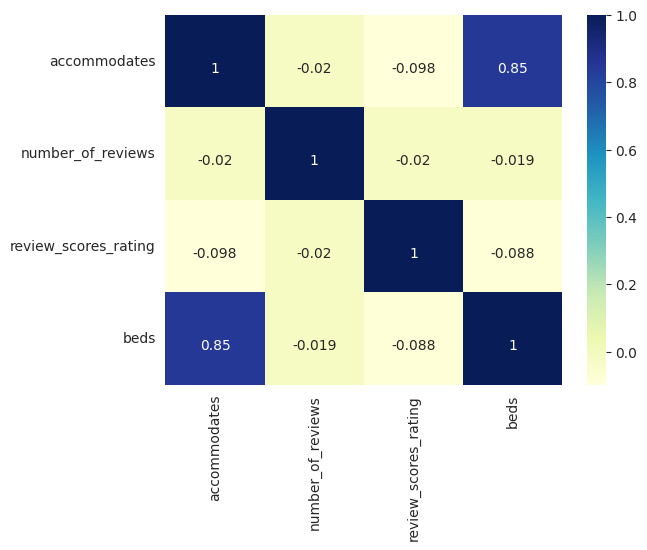

In [ ]:
import seaborn as sns

corr = df[col].corr()
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

수용가능 인원의 수와 침대의 수가 정비례하기에 해당 변수들의 상관관계가 높을 것으로 추정하였는데

'accommodates' 변수와 'beds' 변수의 상관관계가 0.85로 매우 높게 측정됨을 확인할 수 있었습니다.

두 변수는 같은 정보를 설명하지만 'accommodates'가 'beds'보다

더 직관적인 변수의 이름을 가졌다고 판단하여 'beds' 변수를 데이터셋에서 제거하겠습니다.

In [ ]:
# 'beds' 변수를 데이터셋에서 제거
df = df.drop(['beds'], axis = 1)

## 8-4. 구간 변수 - t-검정

In [ ]:
from scipy import stats

data_1 = df[df['log_price'] >= 4.71]['accommodates']
data_0 = df[df['log_price'] < 4.71]['accommodates']

stats.ttest_ind(data_1, data_0)
# 결과는 pvalue < 0.05

Ttest_indResult(statistic=72.7489893469002, pvalue=0.0)

In [ ]:
data_1 = df[df['log_price'] >= 4.71]['number_of_reviews']
data_0 = df[df['log_price'] < 4.71]['number_of_reviews']

stats.ttest_ind(data_1, data_0)
# 결과는 pvalue < 0.05

Ttest_indResult(statistic=-2.6765551565622037, pvalue=0.007444267801017797)

In [ ]:
data_1 = df[df['log_price'] >= 4.71]['review_scores_rating']
data_0 = df[df['log_price'] < 4.71]['review_scores_rating']

stats.ttest_ind(data_1, data_0)
# 결과는 pvalue < 0.05

Ttest_indResult(statistic=10.67899040305936, pvalue=1.4999677481586708e-26)

세 경우 모두 p-value 값이 0.05보다 작은 값(유의수준 아래)이므로,
통계적으로 유의미한 차이가 있다고 할 수 있습니다.
즉, 'log_price'가 4.71 이상인 그룹과 4.71 미만인 그룹 간에
'accommodates',  'review_scores_rating', 'number_of_reviews'
속성에 대한 평균 차이가 통계적으로 유의미하다는 것을 의미합니다.


### 9. 범주형 변수 - 도수 분포표 검토

In [ ]:
# 범주형 변수를 col에 저장
col = ['property_type', 'room_type', 'bed_type',
    'cancellation_policy','cleaning_fee', 'city',
    'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

# 범주형 변수 만으로 구성된 데이터프레임 dfc 생성
dfc = df[col]

# 각 열의 이름을 출력하고, 해당 열의 value_counts 결과를 출력
for col in dfc.columns:
    print("")
    print("---- %s ---" % col)
    print(df[col].value_counts(dropna=False, normalize=True))


---- property_type ---
Apartment            0.63
House                0.25
Condominium          0.03
Townhouse            0.02
Loft                 0.02
Bed & Breakfast      0.01
Guesthouse           0.01
Other                0.01
Bungalow             0.01
Guest suite          0.00
Cabin                0.00
Villa                0.00
Camper/RV            0.00
Dorm                 0.00
In-law               0.00
Boutique hotel       0.00
Hostel               0.00
Boat                 0.00
Tent                 0.00
Timeshare            0.00
Yurt                 0.00
Castle               0.00
Hut                  0.00
Serviced apartment   0.00
Treehouse            0.00
Chalet               0.00
Tipi                 0.00
Cave                 0.00
Earth House          0.00
Train                0.00
Island               0.00
Name: property_type, dtype: float64

---- room_type ---
Entire home/apt   0.59
Private room      0.39
Shared room       0.02
Name: room_type, dtype: float64

---- bed_typ

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df['property_type_encoded'] = OrdinalEncoder().fit_transform(df['property_type'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['property_type', 'property_type_encoded']).size()

property_type       property_type_encoded
Apartment           0.00                     12830
Bed & Breakfast     1.00                       181
Boat                2.00                        11
Boutique hotel      3.00                        14
Bungalow            4.00                       144
Cabin               5.00                        41
Camper/RV           6.00                        30
Castle              7.00                         3
Cave                8.00                         1
Chalet              9.00                         3
Condominium         10.00                      591
Dorm                11.00                       27
Earth House         12.00                        1
Guest suite         13.00                       51
Guesthouse          14.00                      179
Hostel              15.00                       14
House               16.00                     5207
Hut                 17.00                        3
In-law              18.00               

In [ ]:
df['room_type_encoded'] = OrdinalEncoder().fit_transform(df['room_type'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['room_type', 'room_type_encoded']).size()

room_type        room_type_encoded
Entire home/apt  0.00                 12017
Private room     1.00                  8020
Shared room      2.00                   398
dtype: int64

In [ ]:
df['bed_type_encoded'] = OrdinalEncoder().fit_transform(df['bed_type'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['bed_type', 'bed_type_encoded']).size()

bed_type       bed_type_encoded
Airbed         0.00                   83
Couch          1.00                   49
Futon          2.00                  256
Pull-out Sofa  3.00                  224
Real Bed       4.00                19823
dtype: int64

In [ ]:
df['cancellation_policy_encoded'] = OrdinalEncoder().fit_transform(df['cancellation_policy'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['cancellation_policy', 'cancellation_policy_encoded']).size()

cancellation_policy  cancellation_policy_encoded
flexible             0.00                            2480
moderate             1.00                            6492
strict               2.00                           11447
super_strict_30      3.00                              16
dtype: int64

In [ ]:
df['cleaning_fee_encoded'] = OrdinalEncoder().fit_transform(df['cleaning_fee'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['cleaning_fee', 'cleaning_fee_encoded']).size()

cleaning_fee  cleaning_fee_encoded
False         0.00                     3272
True          1.00                    17163
dtype: int64

In [ ]:
df['city_encoded'] = OrdinalEncoder().fit_transform(df['city'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['city', 'city_encoded']).size()

city     city_encoded
Boston   0.00            1107
Chicago  1.00            1361
DC       2.00            1478
LA       3.00            6362
NYC      4.00            8032
SF       5.00            2095
dtype: int64

In [ ]:
df['host_has_profile_pic_encoded'] = OrdinalEncoder().fit_transform(df['host_has_profile_pic'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['host_has_profile_pic', 'host_has_profile_pic_encoded']).size()

host_has_profile_pic  host_has_profile_pic_encoded
f                     0.00                               20
t                     1.00                            20372
dtype: int64

In [ ]:
df['host_identity_verified_encoded'] = OrdinalEncoder().fit_transform(df['host_identity_verified'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['host_identity_verified', 'host_identity_verified_encoded']).size()

host_identity_verified  host_identity_verified_encoded
f                       0.00                               4009
t                       1.00                              16383
dtype: int64

In [ ]:
df['instant_bookable_encoded'] = OrdinalEncoder().fit_transform(df['instant_bookable'].values.reshape(-1,1))


# 변경 전 후 변수값 비교표 디스플레이
df.groupby(['instant_bookable', 'instant_bookable_encoded']).size()

instant_bookable  instant_bookable_encoded
f                 0.00                        14039
t                 1.00                         6396
dtype: int64

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'city', 'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'property_type_encoded',
       'room_type_encoded', 'bed_type_encoded', 'cancellation_policy_encoded',
       'cleaning_fee_encoded', 'city_encoded', 'host_has_profile_pic_encoded',
       'host_identity_verified_encoded', 'instant_bookable_encoded'],
      dtype='object')

In [ ]:
df.drop(['property_type', 'room_type', 'bed_type',
         'cancellation_policy', 'cleaning_fee', 'city',
         'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'],
        axis = 1, inplace = True)

In [ ]:
df.columns

Index(['id', 'log_price', 'amenities', 'accommodates', 'description',
       'first_review', 'host_response_rate', 'host_since', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode',
       'property_type_encoded', 'room_type_encoded', 'bed_type_encoded',
       'cancellation_policy_encoded', 'cleaning_fee_encoded', 'city_encoded',
       'host_has_profile_pic_encoded', 'host_identity_verified_encoded',
       'instant_bookable_encoded'],
      dtype='object')

In [ ]:
df.shape

(20435, 26)

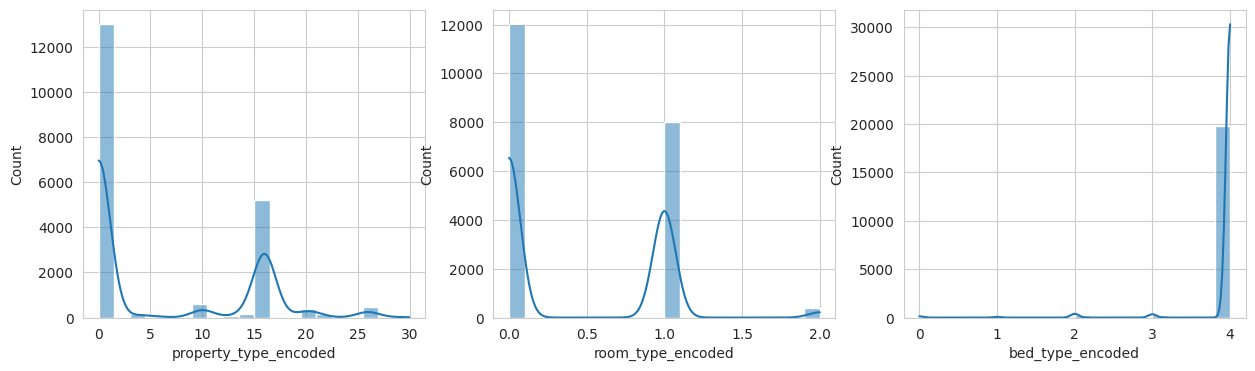

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="property_type_encoded", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="room_type_encoded", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="bed_type_encoded", kde=True, bins=20);

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/preprocessed_dataset.csv', index=False)

## 10-1. 타겟변수 비율 점검 및 필요 시 조치

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/preprocessed_dataset.csv')

# 타겟 변수, 구간형 변수, 범주형 변수를 제외한 나머지 변수 데이터셋에서 제거
df = df.drop(['amenities', 'thumbnail_url', 'zipcode', 'description', 'last_review', 'host_since',
              'host_response_rate', 'first_review', 'name', 'neighbourhood'], axis = 1)
# 결측값 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20392 entries, 0 to 20434
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20392 non-null  int64  
 1   log_price                       20392 non-null  float64
 2   accommodates                    20392 non-null  int64  
 3   latitude                        20392 non-null  float64
 4   longitude                       20392 non-null  float64
 5   number_of_reviews               20392 non-null  float64
 6   review_scores_rating            20392 non-null  float64
 7   property_type_encoded           20392 non-null  float64
 8   room_type_encoded               20392 non-null  float64
 9   bed_type_encoded                20392 non-null  float64
 10  cancellation_policy_encoded     20392 non-null  float64
 11  cleaning_fee_encoded            20392 non-null  float64
 12  city_encoded                    

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 중위수 기준으로 타겟 변수를 이진값 변수로 변경
print(df['log_price'].median())
df.loc[df['log_price'] >= df['log_price'].median(), "log_price_T"] = 1
df.loc[df['log_price'] < df['log_price'].median(), "log_price_T"] = 0

# 타겟 변수만 target에 저장
target = df['log_price_T']

4.700480365792417


In [ ]:
data.shape

(20392, 15)

In [ ]:
target.shape

(20392,)

In [ ]:
target.value_counts(dropna=False)

1.00    10428
0.00     9964
Name: log_price_T, dtype: int64

In [ ]:
target.value_counts(dropna=False, normalize=True)

1.00   0.51
0.00   0.49
Name: log_price_T, dtype: float64

타겟 변수에 별도의 조치가 필요하지 않음을 알 수 있었습니다.

## 10-2. 트리 모델 실행 및 성능 평가 (정확도 및 ROC AUC 값)

In [ ]:
# 50:50 비율로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

# 훈련 데이터의 독립변수
print("X_train shape:", X_train.shape)
# 테스트 데이터의 독립변수
print("X_test shape:", X_test.shape)

X_train shape: (10196, 15)
X_test shape: (10196, 15)


In [ ]:
# 훈련 데이터의 종속변수
print("y_train shape:", y_train.shape)
# 테스트 데이터의 종속변수
print("y_test shape:", y_test.shape)

y_train shape: (10196,)
y_test shape: (10196,)


In [ ]:
y_train.value_counts(dropna=True)

1.00    5300
0.00    4896
Name: log_price_T, dtype: int64

In [ ]:
y_train.value_counts(dropna=True, normalize=True)

1.00   0.52
0.00   0.48
Name: log_price_T, dtype: float64

In [ ]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

# X_train : 학습 데이터셋의 독립변수(X)들로 이루어진 데이터
# y_train : 학습 데이터셋의 종속변수(y)로 이루어진 데이터
print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))

# y_test : 테스트 데이터셋의 종속변수(y)로 이루어진 데이터
# pred: 학습된 DecisionTreeClassifier 모델이 테스트 데이터셋의 독립변수(X)를 이용하여 예측한 종속변수(y)의 예측값
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.78217


In [ ]:
# Decision Tree 모델 (Gini 기준)
tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5)

# 그리드 서치
from sklearn.model_selection import GridSearchCV

# 2개의 기준(지니와 엔트로피) 마다 20개의 max_depth 값을 대입하며
params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

# 이를 5회 교차 검증하므로 총 학습 횟수는 200회이다.
grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.82444
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 6}


In [ ]:
# 정확도
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.81522


In [ ]:
# ROC AUC값
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.89153


In [ ]:
# 변수 중요도
print ("Feature importances:")
print (best_clf.feature_importances_)

Feature importances:
[0.00212675 0.07382927 0.08296699 0.17417963 0.00250068 0.02567423
 0.00086907 0.60133561 0.         0.         0.         0.03651778
 0.         0.         0.        ]


트리 모델을 실행 및 성능 평가한 결과
정확도는 Accuracy on test set:0.81522, ROC AUC 값은 ROC AUC on test set:0.89153 임을 알 수 있었습니다.

## 11-1. 더미 변수 생성

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/preprocessed_dataset.csv')

# 타겟 변수, 구간형 변수, 범주형 변수를 제외한 나머지 변수 데이터셋에서 제거
df = df.drop(['amenities', 'thumbnail_url', 'zipcode', 'description', 'last_review', 'host_since',
              'host_response_rate', 'first_review', 'name', 'neighbourhood', 'latitude', 'longitude', 'id'], axis = 1)

# 결측값 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20392 entries, 0 to 20434
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   log_price                       20392 non-null  float64
 1   accommodates                    20392 non-null  int64  
 2   number_of_reviews               20392 non-null  float64
 3   review_scores_rating            20392 non-null  float64
 4   property_type_encoded           20392 non-null  float64
 5   room_type_encoded               20392 non-null  float64
 6   bed_type_encoded                20392 non-null  float64
 7   cancellation_policy_encoded     20392 non-null  float64
 8   cleaning_fee_encoded            20392 non-null  float64
 9   city_encoded                    20392 non-null  float64
 10  host_has_profile_pic_encoded    20392 non-null  float64
 11  host_identity_verified_encoded  20392 non-null  float64
 12  instant_bookable_encoded        

In [ ]:
# 범주형 변수 중에서 값으로 0과 1만 가지는(이미 더미 변수화 되어 있는)4개 변수명을 제외하고서 cols2에 저장
cols2 = ['property_type_encoded', 'bed_type_encoded',
         'cancellation_policy_encoded', 'city_encoded']

In [ ]:
# cols2에 담긴 변수들의 더미 변수를 생성, 기존 원본 변수는 제거
df1 = pd.get_dummies(df, columns=cols2)

In [ ]:
df1.head(3)

,log_price,accommodates,number_of_reviews,review_scores_rating,room_type_encoded,cleaning_fee_encoded,host_has_profile_pic_encoded,host_identity_verified_encoded,instant_bookable_encoded,property_type_encoded_0.0,property_type_encoded_1.0,property_type_encoded_2.0,property_type_encoded_3.0,property_type_encoded_4.0,property_type_encoded_5.0,property_type_encoded_6.0,property_type_encoded_7.0,property_type_encoded_8.0,property_type_encoded_9.0,property_type_encoded_10.0,property_type_encoded_11.0,property_type_encoded_12.0,property_type_encoded_13.0,property_type_encoded_14.0,property_type_encoded_15.0,property_type_encoded_16.0,property_type_encoded_17.0,property_type_encoded_18.0,property_type_encoded_19.0,property_type_encoded_20.0,property_type_encoded_21.0,property_type_encoded_22.0,property_type_encoded_23.0,property_type_encoded_24.0,property_type_encoded_25.0,property_type_encoded_26.0,property_type_encoded_27.0,property_type_encoded_28.0,property_type_encoded_29.0,property_type_encoded_30.0,bed_type_encoded_0.0,bed_type_encoded_1.0,bed_type_encoded_2.0,bed_type_encoded_3.0,bed_type_encoded_4.0,cancellation_policy_encoded_0.0,cancellation_policy_encoded_1.0,cancellation_policy_encoded_2.0,cancellation_policy_encoded_3.0,city_encoded_0.0,city_encoded_1.0,city_encoded_2.0,city_encoded_3.0,city_encoded_4.0,city_encoded_5.0
0,4.79,2,5.08,99.00,1.00,1.00,1.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,4.61,2,4.42,93.00,1.00,1.00,1.00,1.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,5.01,4,3.40,97.00,0.00,1.00,1.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
list(df1.columns)

['log_price',
 'accommodates',
 'number_of_reviews',
 'review_scores_rating',
 'room_type_encoded',
 'cleaning_fee_encoded',
 'host_has_profile_pic_encoded',
 'host_identity_verified_encoded',
 'instant_bookable_encoded',
 'property_type_encoded_0.0',
 'property_type_encoded_1.0',
 'property_type_encoded_2.0',
 'property_type_encoded_3.0',
 'property_type_encoded_4.0',
 'property_type_encoded_5.0',
 'property_type_encoded_6.0',
 'property_type_encoded_7.0',
 'property_type_encoded_8.0',
 'property_type_encoded_9.0',
 'property_type_encoded_10.0',
 'property_type_encoded_11.0',
 'property_type_encoded_12.0',
 'property_type_encoded_13.0',
 'property_type_encoded_14.0',
 'property_type_encoded_15.0',
 'property_type_encoded_16.0',
 'property_type_encoded_17.0',
 'property_type_encoded_18.0',
 'property_type_encoded_19.0',
 'property_type_encoded_20.0',
 'property_type_encoded_21.0',
 'property_type_encoded_22.0',
 'property_type_encoded_23.0',
 'property_type_encoded_24.0',
 'property_ty

In [ ]:
# 기준 더미 변수(base dummy variable)로 정한 3개 더미 변수명을 cols3에 저장
cols3 = ['property_type_encoded_0.0','bed_type_encoded_2.0',
        'cancellation_policy_encoded_3.0', 'city_encoded_4.0']

# cols3에 저장된 3개의 기준 더미 변수를 데이터프레임에서 제거
df1.drop(cols3, axis=1, inplace=True)

df1.shape

(20392, 51)

## 11-2. 데이터 표준화

In [ ]:
df = df1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20392 entries, 0 to 20434
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   log_price                        20392 non-null  float64
 1   accommodates                     20392 non-null  int64  
 2   number_of_reviews                20392 non-null  float64
 3   review_scores_rating             20392 non-null  float64
 4   room_type_encoded                20392 non-null  float64
 5   cleaning_fee_encoded             20392 non-null  float64
 6   host_has_profile_pic_encoded     20392 non-null  float64
 7   host_identity_verified_encoded   20392 non-null  float64
 8   instant_bookable_encoded         20392 non-null  float64
 9   property_type_encoded_1.0        20392 non-null  uint8  
 10  property_type_encoded_2.0        20392 non-null  uint8  
 11  property_type_encoded_3.0        20392 non-null  uint8  
 12  property_type_enco

In [ ]:
# dtype을 category로 지정해 줄 변수들을 cols에 임시 저장
cols = ['room_type_encoded', 'cleaning_fee_encoded', 'host_has_profile_pic_encoded',
       'host_identity_verified_encoded', 'instant_bookable_encoded',
       'property_type_encoded_1.0', 'property_type_encoded_2.0',
       'property_type_encoded_3.0', 'property_type_encoded_4.0',
       'property_type_encoded_5.0', 'property_type_encoded_6.0',
       'property_type_encoded_7.0', 'property_type_encoded_8.0',
       'property_type_encoded_9.0', 'property_type_encoded_10.0',
       'property_type_encoded_11.0', 'property_type_encoded_12.0',
       'property_type_encoded_13.0', 'property_type_encoded_14.0',
       'property_type_encoded_15.0', 'property_type_encoded_16.0',
       'property_type_encoded_17.0', 'property_type_encoded_18.0',
       'property_type_encoded_19.0', 'property_type_encoded_20.0',
       'property_type_encoded_21.0', 'property_type_encoded_22.0',
       'property_type_encoded_23.0', 'property_type_encoded_24.0',
       'property_type_encoded_25.0', 'property_type_encoded_26.0',
       'property_type_encoded_27.0', 'property_type_encoded_28.0',
       'property_type_encoded_29.0', 'property_type_encoded_30.0',
       'bed_type_encoded_0.0', 'bed_type_encoded_1.0', 'bed_type_encoded_3.0',
       'bed_type_encoded_4.0', 'cancellation_policy_encoded_0.0',
       'cancellation_policy_encoded_1.0', 'cancellation_policy_encoded_2.0',
       'city_encoded_0.0', 'city_encoded_1.0', 'city_encoded_2.0',
       'city_encoded_3.0', 'city_encoded_5.0']

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
numeric_cols = ['accommodates', 'number_of_reviews', 'review_scores_rating']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터 프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터 프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,accommodates,number_of_reviews,review_scores_rating
0,-0.69,1.79,1.11
1,-0.69,0.75,-0.30
2,0.39,-0.86,0.64
3,-0.69,-1.02,-1.94
4,-0.69,-1.02,0.87


In [ ]:
# 기존 데이터 프레임 df에서 구간 변수들을 제거하여 df_cat에 저장
df_cat = df.drop(numeric_cols, axis=1)

In [ ]:
# 구간 변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
df_standard = pd.concat([df_num_standard, df_cat], axis=1)
df_standard = df_standard.dropna()
df_standard.info()

# 병합한 데이터 프레임을 csv 형태로 저장
df_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20350 entries, 0 to 20391
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

## 11-3. 로지스틱 회귀 모델 실행 및 성능 평가 (정확도 및 ROC AUC값)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 중위수 기준으로 타겟 변수를 이진값 변수로 변경
print(df['log_price'].median())
df.loc[df['log_price'] >= df['log_price'].median(), "log_price_T"] = 1
df.loc[df['log_price'] < df['log_price'].median(), "log_price_T"] = 0

# 타겟 변수만 target에 저장
target = df['log_price_T']

4.700480365792417


In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.80727
Logreg Test set score:0.80069


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.80521
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
# 정확도
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.80069


In [ ]:
# ROC AUC값
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.85876


로지스틱 회귀 모델을 실행 및 성능 평가한 결과
정확도는 Accuracy on test set:0.80069, ROC AUC 값은 ROC AUC on test set:0.85876 임을 알 수 있었습니다.


## 11-4. 범주형 변수 및 구간 변수 오즈비 해석

In [ ]:
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

절편 [0.253]
회귀계수 [[-0.004 -0.031  0.005 -3.228  0.244  0.453  0.005 -0.168  0.371 -2.87
  -0.069 -0.063 -0.501 -0.894  0.818  0.811 -0.361  0.63  -1.999 -1.722
  -1.283 -0.796  0.146  0.073 -2.393 -0.821  0.     1.068 -0.489  0.76
   0.253 -0.651  0.7    0.13   0.81  -0.485  0.422 -3.057  1.362 -1.272
   0.353  1.106 -0.795 -0.577 -0.312  0.237 -1.134 -0.684 -0.732  1.49 ]]


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터 프레임 만들기

# 변수명(컬럼명)을 리스트 형태로 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])

# 변수 coef의 값들을 오름차순으로 정리
dft1 = dft.sort_values(by='coef', ascending=True)
dft1

,coef
room_type_encoded,-3.23
property_type_encoded_30.0,-3.06
property_type_encoded_2.0,-2.87
property_type_encoded_17.0,-2.39
property_type_encoded_11.0,-2.00
property_type_encoded_12.0,-1.72
property_type_encoded_13.0,-1.28
bed_type_encoded_1.0,-1.27
city_encoded_1.0,-1.13
property_type_encoded_6.0,-0.89


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

# 변수명(컬럼명)을 리스트 형태로 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])

# 변수 coef의 값들을 내림차순으로 정리
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)
dft1

,Odds_ratio
city_encoded_5.0,4.44
bed_type_encoded_0.0,3.91
bed_type_encoded_4.0,3.02
property_type_encoded_20.0,2.91
property_type_encoded_7.0,2.27
property_type_encoded_8.0,2.25
property_type_encoded_27.0,2.25
property_type_encoded_22.0,2.14
property_type_encoded_25.0,2.01
property_type_encoded_10.0,1.88


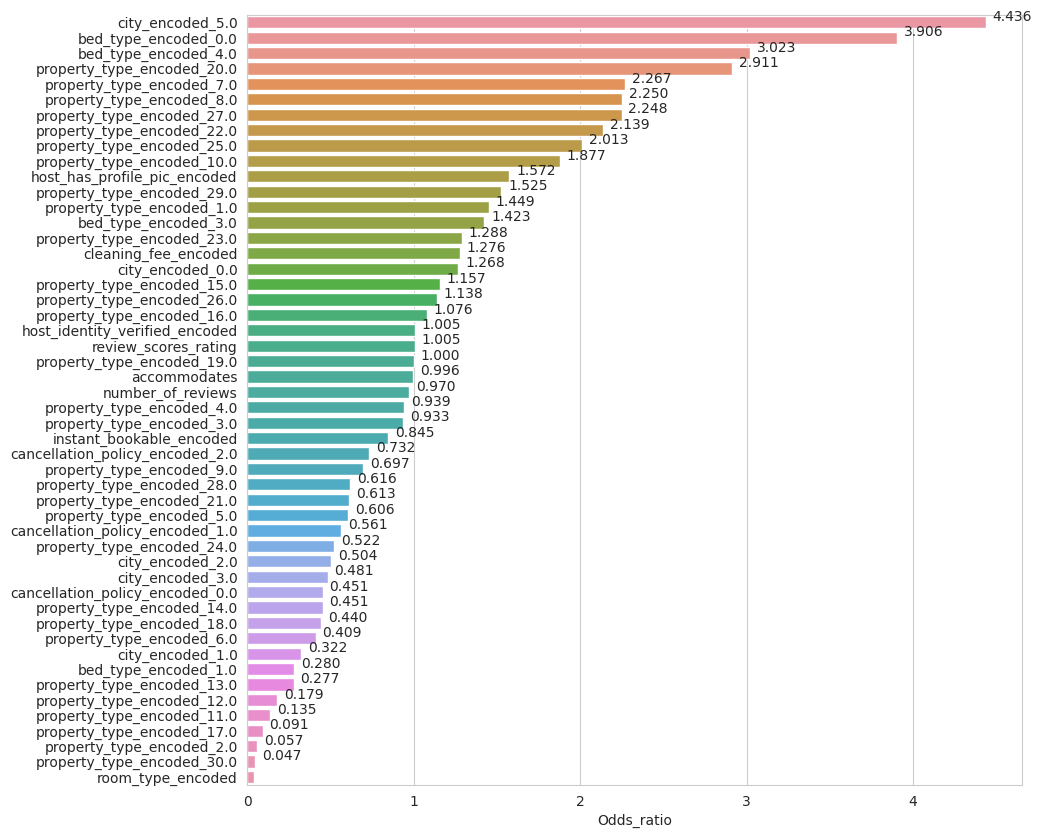

In [ ]:
# 데이터 프레임 dft1의 막대 그래프(barplot) 출력
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 그래프 크기 조정
plt.figure(figsize=(10, 10))

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

범주형 변수 해석
('property_type_encoded', 'bed_type_encoded', 'cancellation_policy_encoded', 'city_encoded', 'cleaning_fee_encoded', 'instant_bookable_encoded')

cleaning_fee(청소비)의 오즈비는 1.28이고 instant_bookable(즉시 예약 가능)의 오즈비는 0.84입니다.

1. 청소비가 없는 경우와 비교하여,
청소비가 있는 경우가 log_price가 4.7 이상일 가능성이 1.28배 높습니다.

2. 즉시 예약 가능하지 않은 경우와 비교하여,
즉시 예약 가능한 경우가 log_price가 4.7 이상일 가능성이 0.84배 낮습니다.

구간 변수 해석
('accommodates', 'number_of_reviews', 'review_scores_rating')

1. number_of_reviews의 경우,
오즈비가 0.97 이므로 number_of_reviews가 1단위만큼 증가할 때
log_price가 4.7 이상일 가능성은 0.97 만큼 변화합니다. 즉, 3% 감소합니다.

2. accommodates와 review_scores_rating의 경우,
오즈비가 1.0 이므로 두 값이 변화하더라도 log_price가 4.7 이상일 가능성은 1.0만큼 변합니다. 즉, 변화가 없습니다.

## 12. 신경망 모델 실행 및 성능 평가 (정확도 및 ROC AUC값)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 중위수 기준으로 타겟 변수를 이진값 변수로 변경
print(df['log_price'].median())
df.loc[df['log_price'] >= df['log_price'].median(), "log_price_T"] = 1
df.loc[df['log_price'] < df['log_price'].median(), "log_price_T"] = 0

# 타겟 변수만 target에 저장
target = df['log_price_T']

4.700480365792417


In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
# Neural Network 모델 (Default 모델 with adam solver)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.83902
Neural Network Test set score:0.79273


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.80442
GridSearchCV best parameter: {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'}


In [ ]:
# 정확도
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.79941


In [ ]:
# ROC AUC값
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.85911


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

# 그리드 서치 재실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.01, 1],
          'activation':['tanh','relu', 'logistic'],
          'hidden_layer_sizes': [(100,), (100,100)]
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.79941


신경망 모델 실행 및 성능 평가한 정확도는 Accuracy on test set:0.79941,
ROC AUC 값은 ROC AUC on test set:0.85911 임을 알 수 있었습니다.

## 13. 랜덤 포레스트 모델 실행 및 성능 평가 (정확도 및 ROC AUC값)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 중위수 기준으로 타겟 변수를 이진값 변수로 변경
print(df['log_price'].median())
df.loc[df['log_price'] >= df['log_price'].median(), "log_price_T"] = 1
df.loc[df['log_price'] < df['log_price'].median(), "log_price_T"] = 0

# 타겟 변수만 target에 저장
target = df['log_price_T']

4.700480365792417


In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)

print("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.99479
Random Forest Accuracy on test set:0.77602


In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

grid_rf = GridSearchCV(rf, param_grid = params, scoring = 'accuracy', cv = cross_validation,
                      verbose = 1, n_jobs = -1)

grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.80541
GridSearchCV best parameter: {'max_depth': 12, 'n_estimators': 200}


In [ ]:
# 정확도
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

# ROC AUC값
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.79912
ROC AUC on test set:0.85764


랜덤 포레스트 모델 실행 및 성능 평가한 정확도는 Accuracy on test set:0.79912,
ROC AUC 값은 ROC AUC on test set:0.85764 임을 확인할 수 있었습니다.

In [ ]:
print("Feature importances: ")
print(best_clf.feature_importances_)

Feature importances: 
[2.87576232e-02 5.52141776e-02 4.24013283e-02 6.28279201e-01
 3.86427855e-02 4.43391043e-04 9.67754112e-03 1.15399826e-02
 4.20510268e-03 5.30521392e-04 4.09682668e-04 1.93432446e-03
 6.42081077e-04 8.80348206e-04 1.73253730e-05 2.43336525e-05
 3.70867791e-06 4.90171559e-03 3.99418474e-04 1.85464732e-04
 1.17492231e-03 3.67581890e-03 7.33403848e-05 1.49070831e-02
 2.00404561e-04 1.93939394e-04 0.00000000e+00 3.86302931e-03
 2.68886556e-03 8.96619622e-05 3.19279813e-04 1.81401580e-05
 5.61779454e-06 2.77927431e-03 1.43031697e-05 5.40045048e-05
 2.22613963e-04 3.12282191e-04 1.10664766e-03 8.46668709e-04
 3.24090257e-03 1.38544548e-02 1.53527203e-02 8.17232979e-03
 2.21990788e-02 5.02330558e-03 1.05723397e-02 6.19096777e-03
 1.56678343e-02 3.80901114e-02]


In [ ]:
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index = feature_names,
                  columns = ['Feature_importances'])

dft1 = dft.sort_values(by = 'Feature_importances', ascending = False)
dft1

,Feature_importances
room_type_encoded,0.628
number_of_reviews,0.055
review_scores_rating,0.042
cleaning_fee_encoded,0.039
city_encoded_5.0,0.038
accommodates,0.029
cancellation_policy_encoded_2.0,0.022
city_encoded_3.0,0.016
property_type_encoded_16.0,0.015
cancellation_policy_encoded_0.0,0.015


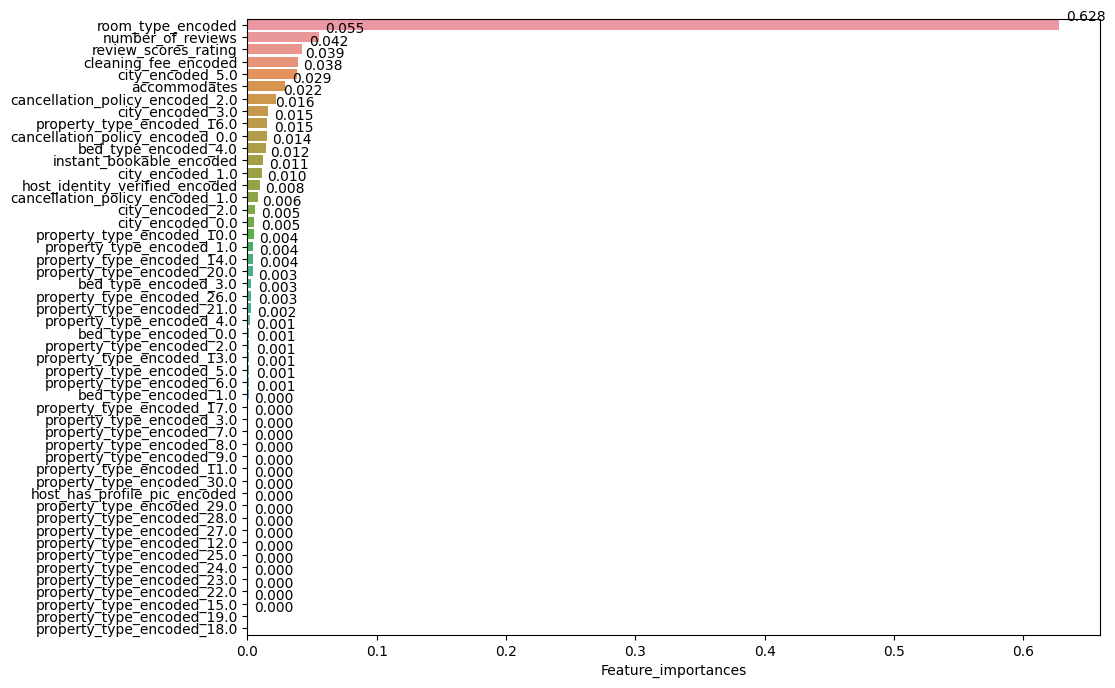

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize = (11, 8))
ax = sns.barplot(y=dft1.index, x = "Feature_importances", data = dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

랜덤 포레스트 모델을 통해 변수 중요도 또한 확인할 수 있었습니다.

## 14. 회귀 모델 및 릿지 모델 실행 및 성능 평가

In [ ]:
# 더미 변수 작업 및 데이터 표준화 작업이 이미 완료된 데이터셋을 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 타겟 변수만 target에 저장
target = df['log_price']

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs = -1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print("Linear Regression test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.47510
Linear Regression test set r2 score:0.48100


회귀 모델 실행 및 성능 평가 시
Linear Regression test set r2 score:0.48100 임을 알 수 있었습니다.

In [ ]:
from sklearn.linear_model import Ridge
clf_Ridge = Ridge()

In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000], \
          'solver':['auto', 'svd', 'lsqr', 'cholesky', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid_Ridge = GridSearchCV(clf_Ridge, param_grid = params, scoring = 'r2', cv = 5,\
                         n_jobs = -1, verbose = 1)

grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
GridSearchCV max score:0.47070
GridSearchCV best parameter: {'alpha': 10, 'solver': 'lsqr'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.48049


릿지 모델 실행 및 성능평가 시
R2 Score on test set:0.48049 임을 알 수 있었습니다.

## 15. XGBoost, LightGBM 모델 실행 및 성능 평가

In [ ]:
# 더미 변수 작업 및 데이터 표준화 작업이 이미 완료된 데이터셋을 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 타겟 변수만 target에 저장
target = df['log_price']

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
# 기본 XGB Regressor 모델
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.47347


In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
             }

xgb_grid = GridSearchCV(xgb,
                       parameters,
                       scoring = 'r2',
                       cv = 3,
                       n_jobs = -1,
                       verbose = True)

xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'n_estimators': [1000],
                         'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'n_estimators': 1000, 'subsample': 0.9}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.36352


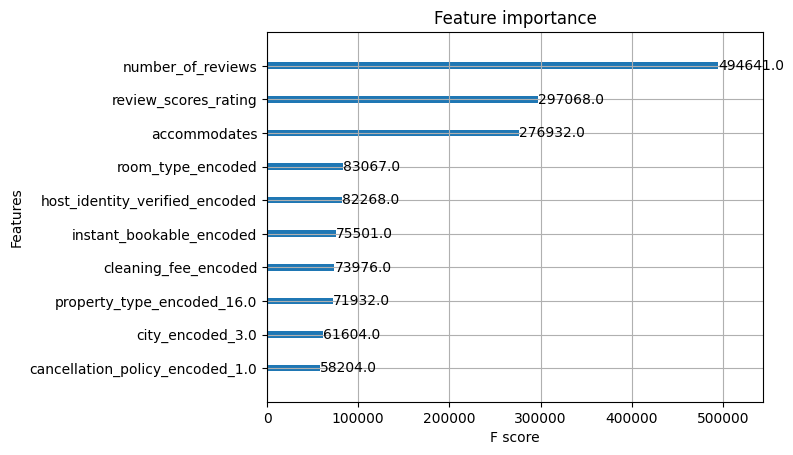

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features = 10);

XGBoost 모델 실행 및 성능 평가 시
r2: 0.36352 임을 알 수 있었습니다.

In [ ]:
# 더미 변수 작업 및 데이터 표준화 작업이 이미 완료된 데이터셋을 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2/project/standardized_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20350 entries, 0 to 20349
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accommodates                     20350 non-null  float64
 1   number_of_reviews                20350 non-null  float64
 2   review_scores_rating             20350 non-null  float64
 3   log_price                        20350 non-null  float64
 4   room_type_encoded                20350 non-null  float64
 5   cleaning_fee_encoded             20350 non-null  float64
 6   host_has_profile_pic_encoded     20350 non-null  float64
 7   host_identity_verified_encoded   20350 non-null  float64
 8   instant_bookable_encoded         20350 non-null  float64
 9   property_type_encoded_1.0        20350 non-null  float64
 10  property_type_encoded_2.0        20350 non-null  float64
 11  property_type_encoded_3.0        20350 non-null  float64
 12  property_type_enco

In [ ]:
# 타겟 변수를 제외한 변수만 data에 저장
data = df.drop(['log_price'], axis = 1)

# 타겟 변수만 target에 저장
target = df['log_price']

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10175, 50)
X_test shape: (10175, 50)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state = 0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.49392


In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight': [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
             }

lgb_grid = GridSearchCV(lgb,
                       parameters,
                       scoring = 'r2',
                       cv = 3,
                       n_jobs = -1,
                       verbose = True)

lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.44316


LightGBM 모델 실행 및 성능 평가 시
r2: 0.44316 임을 알 수 있었습니다.

## 16. 8개 모델 중 챔피언 모델 선정

**[이진값 타겟변수 정확도]**

1.   트리 모델 : 0.81522
2.   로지스틱 회귀 모델 : 0.80069
3.   신경망 모델 : 0.79941
4.   랜덤 포레스트 모델 : 0.79912

따라서 트리 모델이 정확도 측면에서의 챔피언 모델입니다.

**[이진값 타겟변수 ROC AUC]**

1.  트리 모델 : 0.89153
2.  로지스틱 회귀 모델 : 0.85876
3.  신경망 모델 : 0.85911
4.  랜덤 포레스트 모델 : 0.85764

따라서 트리 모델이 ROC AUC 측면에서의 챔피언 모델입니다.

**[연속형 타겟변수 R2 스코어]**

1.  회귀 모델 : 0.48100
2.  릿지 모델 : 0.48049
3.  XGBoost 모델 : 0.36352
4.  LightGBM 모델 : 0.44316

따라서 회귀 모델이 이 프로젝트에서 사용한 데이터셋에서
가장 좋은 결과를 가진 챔피언 모델입니다.